In [69]:
import os
import sys
import yaml

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
os.getcwd()

'/home/T0069N5/mlops/fastapi-ml/src/notebooks'

In [63]:
from ml.model import *
from ml.data import process_data
from clean_data import load_data

In [65]:
with open("../config.yaml", "rb") as f:
    config = yaml.safe_load(f)

In [67]:
config['CLEANED_DATA_PATH']

'./data/cleaned_census.csv'

In [70]:
!ls

slice.ipynb  train_model.ipynb


In [72]:
os.path.join("..", config['CLEANED_DATA_PATH'])

'.././data/cleaned_census.csv'

In [73]:
data = load_data(os.path.join("..", config['CLEANED_DATA_PATH']))

In [75]:
data.head()

,age,workclass,fnlgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [76]:
from sklearn.model_selection import train_test_split

In [77]:
train, _ = train_test_split(data, test_size=0.20, random_state=42)

In [81]:
train.head()

,age,workclass,fnlgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
5514,33,Local-gov,198183,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,>50K
19777,36,Private,86459,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1887,50,United-States,>50K
10781,58,Self-emp-not-inc,203039,9th,5,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
32240,21,Private,180190,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,46,United-States,<=50K
9876,27,Private,279872,Some-college,10,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [90]:
for col in config['CAT_FEATURES']:
    print(col, train[col].nunique())
    print(">"*10)
    for i, slice in enumerate(train[col].unique()):
        print(i+1, slice)

    
    print("-"*50)
    

workclass 9
>>>>>>>>>>
1 Local-gov
2 Private
3 Self-emp-not-inc
4 Missing
5 Federal-gov
6 Self-emp-inc
7 State-gov
8 Without-pay
9 Never-worked
--------------------------------------------------
education 16
>>>>>>>>>>
1 Bachelors
2 Assoc-voc
3 9th
4 Some-college
5 10th
6 HS-grad
7 Prof-school
8 Assoc-acdm
9 11th
10 12th
11 Masters
12 7th-8th
13 Doctorate
14 5th-6th
15 1st-4th
16 Preschool
--------------------------------------------------
marital_status 7
>>>>>>>>>>
1 Never-married
2 Married-civ-spouse
3 Separated
4 Divorced
5 Widowed
6 Married-spouse-absent
7 Married-AF-spouse
--------------------------------------------------
occupation 15
>>>>>>>>>>
1 Prof-specialty
2 Exec-managerial
3 Craft-repair
4 Farming-fishing
5 Other-service
6 Machine-op-inspct
7 Sales
8 Handlers-cleaners
9 Transport-moving
10 Protective-serv
11 Missing
12 Adm-clerical
13 Priv-house-serv
14 Tech-support
15 Armed-Forces
--------------------------------------------------
relationship 6
>>>>>>>>>>
1 Not-in-fami

In [96]:
# Proces the test data with the process_data function.
X_train, y_train, encoder, lb = process_data(
    train, categorical_features=config['CAT_FEATURES'], label=config['LABEL'], training=True
)

# # Train and save a model.
model = train_model(X_train, y_train)

# Proces the test data with the process_data function.
X_test, y_test, encoder, lb = process_data(
    data, categorical_features=config['CAT_FEATURES'], label=config['LABEL'], training=False, encoder=encoder, lb=lb
)

In [99]:
y_preds = inference(model, X_test)

In [100]:
compute_model_metrics(y_test, y_preds)

(0.9563157894736842, 0.9269225864047953, 0.9413898063596918)

In [102]:
subset_df = data[data['workclass']=="Private"].copy()

,age,workclass,fnlgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [97]:
model

RandomForestClassifier()

In [148]:
slices = {}

for col in config['CAT_FEATURES']:
    print(col, data[col].nunique())
    print(">"*10)
    # slices[col] = []
    for i, slice in enumerate(data[col].unique()):
        print(i+1, slice)
    
        subset_df = data[data[col]==slice].copy()

        X_test, y_test, encoder, lb = process_data(
            subset_df, categorical_features=config['CAT_FEATURES'], label=config['LABEL'], training=False, encoder=encoder, lb=lb
        )

        y_preds = inference(model, X_test)

        
        
        # slices[col].append({slice:dict(zip(("precision","recall","fbeta"),compute_model_metrics(y_test, y_preds)))})

        slices[str(col)+"_"+str(slice)] = dict(zip(("precision","recall","fbeta"),compute_model_metrics(y_test, y_preds)))
    
    print("-"*50)
    # break
slices

workclass 9
>>>>>>>>>>
1 State-gov
2 Self-emp-not-inc
3 Private
4 Federal-gov
5 Local-gov
6 Missing
7 Self-emp-inc
8 Without-pay
9 Never-worked
--------------------------------------------------
education 16
>>>>>>>>>>
1 Bachelors
2 HS-grad
3 11th
4 Masters
5 9th
6 Some-college
7 Assoc-acdm
8 Assoc-voc
9 7th-8th
10 Doctorate
11 Prof-school
12 5th-6th
13 10th
14 1st-4th
15 Preschool
16 12th
--------------------------------------------------
marital_status 7
>>>>>>>>>>
1 Never-married
2 Married-civ-spouse
3 Divorced
4 Married-spouse-absent
5 Separated
6 Married-AF-spouse
7 Widowed
--------------------------------------------------
occupation 15
>>>>>>>>>>
1 Adm-clerical
2 Exec-managerial
3 Handlers-cleaners
4 Prof-specialty
5 Other-service
6 Sales
7 Craft-repair
8 Transport-moving
9 Farming-fishing
10 Machine-op-inspct
11 Tech-support
12 Missing
13 Protective-serv
14 Armed-Forces
15 Priv-house-serv
--------------------------------------------------
relationship 6
>>>>>>>>>>
1 Not-in-fami

{'workclass_State-gov': {'precision': 0.9534883720930233,
  'recall': 0.9291784702549575,
  'fbeta': 0.9411764705882353},
 'workclass_Self-emp-not-inc': {'precision': 0.9525925925925925,
  'recall': 0.888121546961326,
  'fbeta': 0.9192280200142959},
 'workclass_Private': {'precision': 0.9553849346337414,
  'recall': 0.927664718920008,
  'fbeta': 0.9413207932938048},
 'workclass_Federal-gov': {'precision': 0.9595687331536388,
  'recall': 0.9595687331536388,
  'fbeta': 0.9595687331536388},
 'workclass_Local-gov': {'precision': 0.9683333333333334,
  'recall': 0.9416531604538088,
  'fbeta': 0.9548069022185702},
 'workclass_Missing': {'precision': 0.9534883720930233,
  'recall': 0.8586387434554974,
  'fbeta': 0.9035812672176308},
 'workclass_Self-emp-inc': {'precision': 0.9563812600969306,
  'recall': 0.9517684887459807,
  'fbeta': 0.9540692989524577},
 'workclass_Without-pay': {'precision': 1.0, 'recall': 1.0, 'fbeta': 1.0},
 'workclass_Never-worked': {'precision': 1.0, 'recall': 1.0, 'fbe

In [149]:
import pandas as pd

In [150]:
slice_df = pd.DataFrame(slices).T

In [151]:
slice_df.index.name = "category"

In [152]:
import matplotlib.pyplot as plt

<Axes: xlabel='category'>

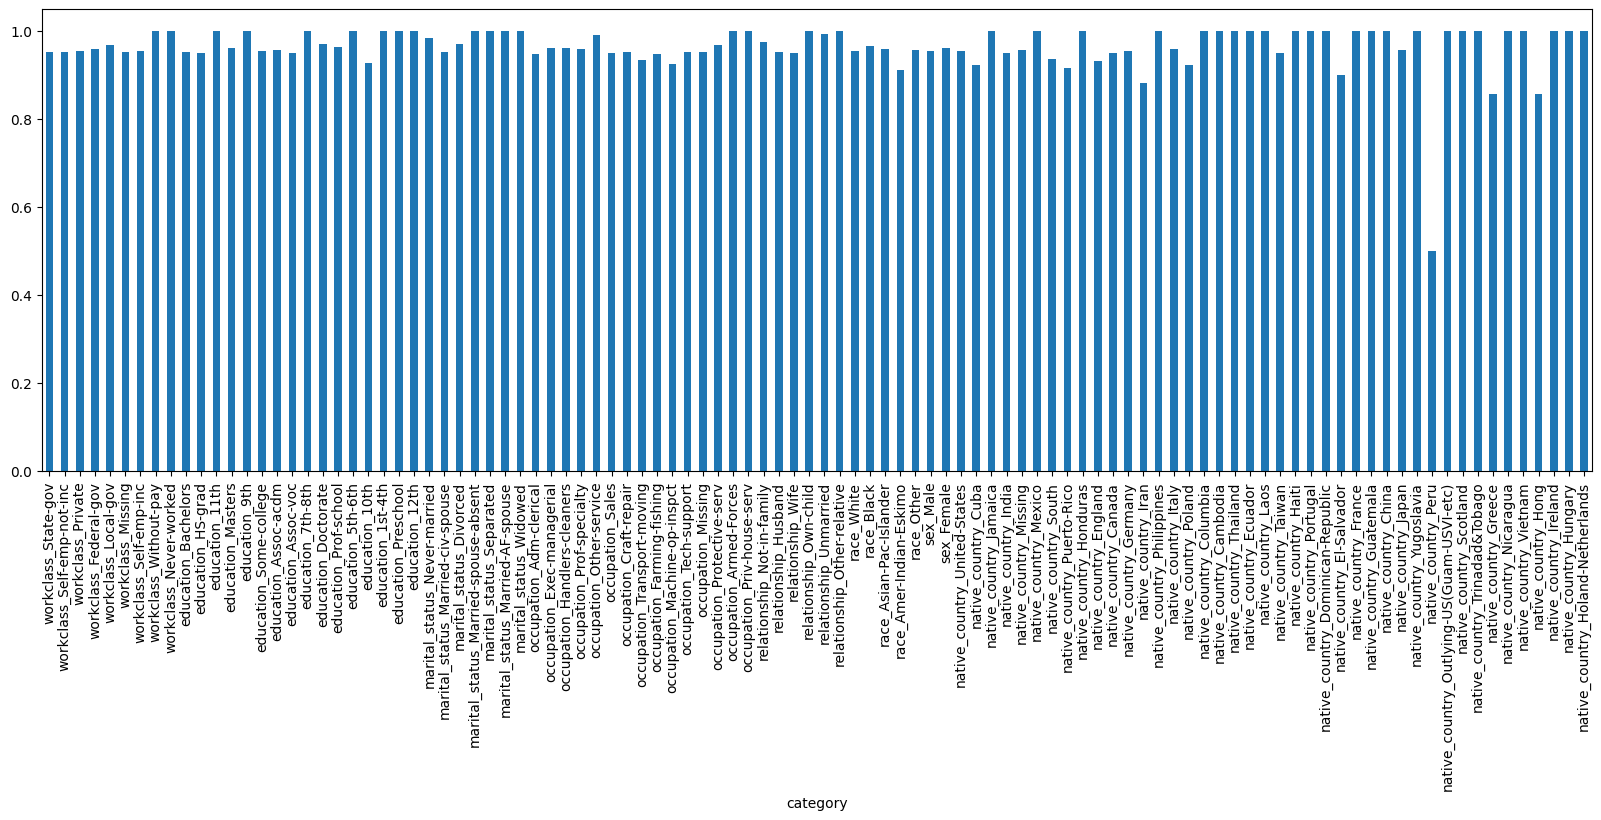

In [153]:
slice_df['precision'].plot(kind='bar',figsize=(20,6))

<Axes: xlabel='category'>

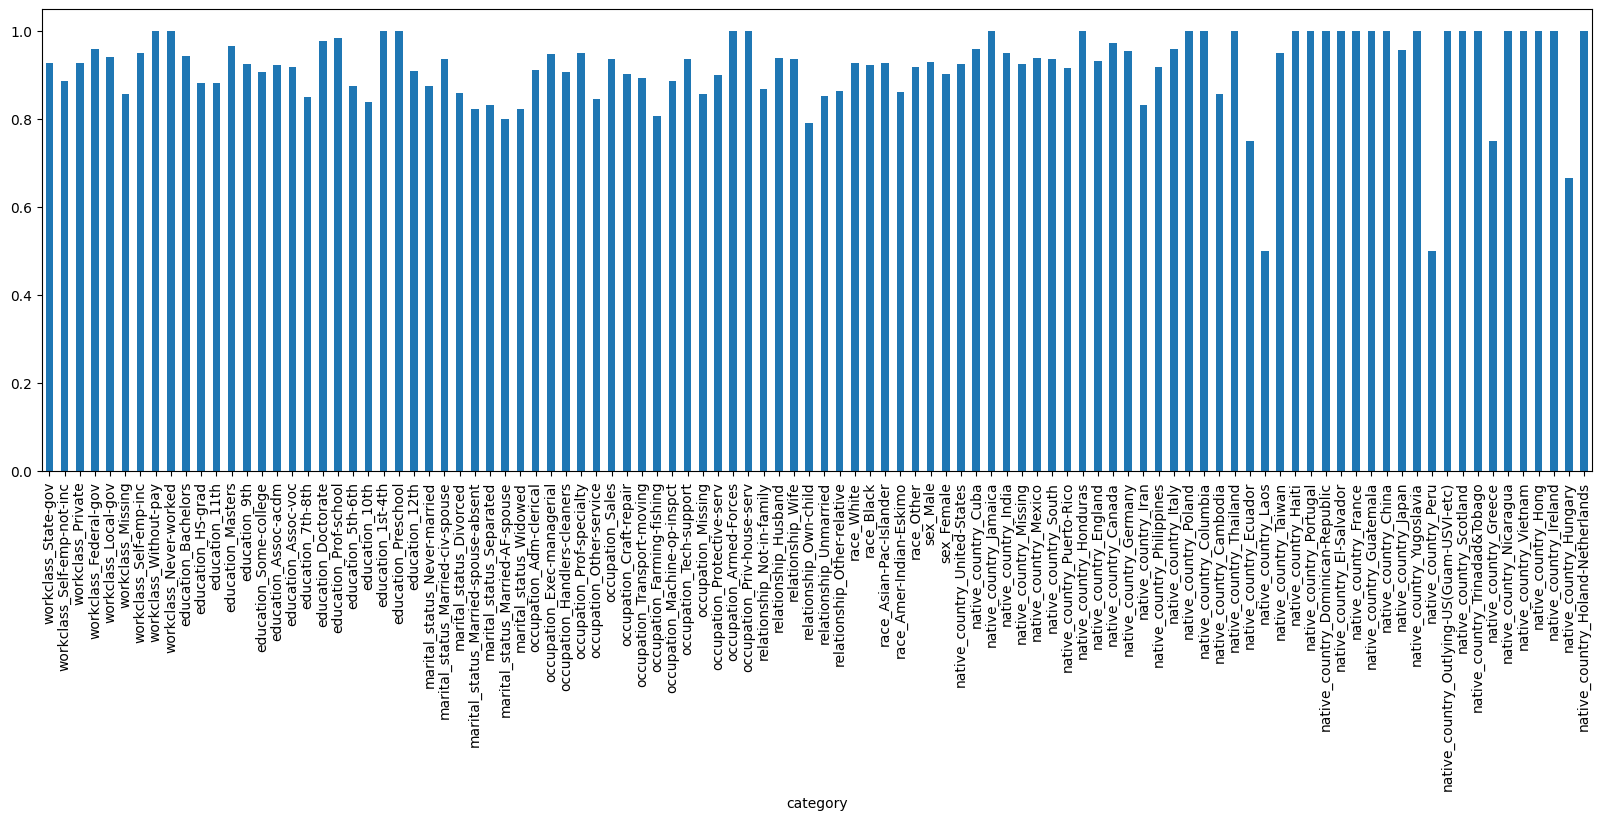

In [154]:
slice_df['recall'].plot(kind='bar',figsize=(20,6))

<Axes: xlabel='category'>

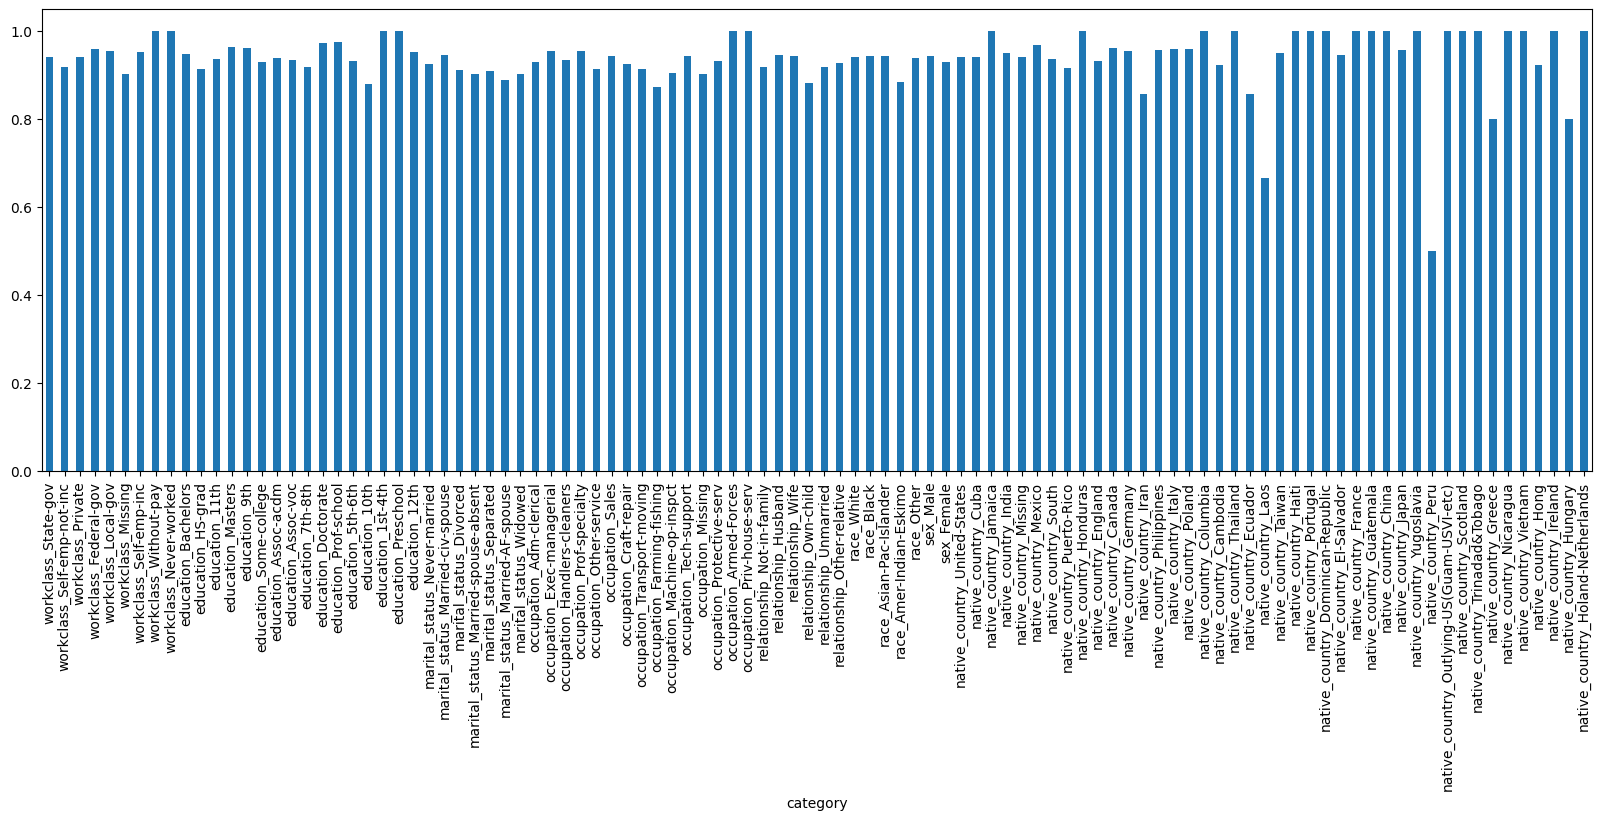

In [155]:
slice_df['fbeta'].plot(kind='bar',figsize=(20,6))

In [156]:

slice_df.to_csv("output.txt")




# save_model(model, file_name="./model/model.pkl")
# save_model(encoder, file_name="./model/onehotencoder.pkl")
# save_model(lb, file_name="./model/labelbinarizer.pkl")